In [9]:
!pip install moexalgo

In [10]:
from moexalgo import Market, Ticker
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
ticker = Ticker('MGKL')

In [4]:
help(ticker.candles)

Help on method candles in module moexalgo.tickers:

candles(*, start: 'Union[str, date]', end: 'Union[str, date]', period: 'Union[str, int, CandlePeriod]' = None, offset: 'int' = 0, cs: 'Session' = None, latest: 'bool' = False, use_dataframe: 'bool' = True) -> 'Union[iter[Candle], pd.DataFrame]' method of moexalgo.stocks.Stock instance
    Возвращает итератор свечей инструмента по заданным параметрам.
    
    Parameters
    ----------
    start : Union[str, date]
        Дата начала диапазона выдачи данных. (`start` может быть равен `end`, тогда вернутся записи за один день)
    end : Union[str, date]
        Дата конца диапазона выдачи данных.
    period : Union[str, int, CandlePeriod], optional
        Период свечи, by default None.
    
        Если `int`, то интерпретируется в следующем формате:
        - 1 - 1 минута
        - 10 - 10 минут
        - 60 - 1 час
        - 24 - 1 день
        - 7 - 1 неделя
        - 31 - 1 месяц
    
        Если `str`, то интерпретируется в следу

2025-04-28 - MGKL: Mean volume = 31720.72, StdDev = 83437.17, 3-sigma threshold = 282032.22
Number of anomalies detected: 14


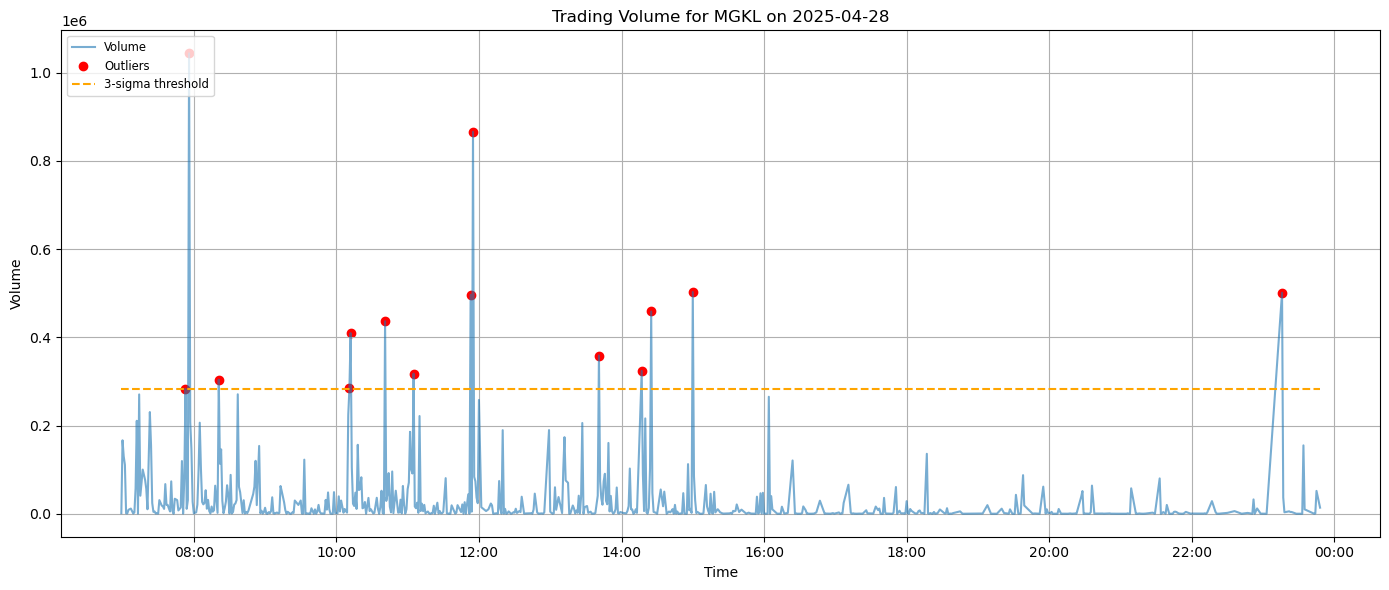

In [5]:
import matplotlib.pyplot as plt
from moexalgo import Ticker
import pandas as pd

def analyze_trading_volume(ticker_symbol, date):
    """
    Analyzes trading volume for a given ticker and date.
    Highlights volume outliers using 3-sigma threshold.
    
    Parameters:
    ticker_symbol (str): Ticker symbol of the stock.
    date (str): Date in format 'YYYY-MM-DD'.
    """
    ticker = Ticker(ticker_symbol)
    df_candles = ticker.candles(start=date, end=date, period='1min')
    
    df_candles['begin'] = pd.to_datetime(df_candles['begin'])
    
    mean_vol = df_candles['volume'].mean()
    std_vol = df_candles['volume'].std()
    threshold = mean_vol + 3 * std_vol
    
    print(f"{date} - {ticker_symbol}: Mean volume = {mean_vol:.2f}, StdDev = {std_vol:.2f}, 3-sigma threshold = {threshold:.2f}")
    
    outliers = df_candles[df_candles['volume'] > threshold]
    num_anomalies = len(outliers)
    print(f"Number of anomalies detected: {num_anomalies}")
    
    plt.figure(figsize=(14, 6))
    plt.plot(df_candles['begin'], df_candles['volume'], label='Volume', alpha=0.6)
    plt.scatter(outliers['begin'], outliers['volume'], color='red', label='Outliers')
    plt.hlines(y=threshold, xmin=df_candles['begin'].min(), xmax=df_candles['begin'].max(),
               colors='orange', linestyles='--', label='3-sigma threshold')
    
    plt.title(f'Trading Volume for {ticker_symbol} on {date}')
    plt.xlabel('Time')
    plt.ylabel('Volume')
    plt.grid(True)
    plt.legend(loc='upper left', fontsize='small')
    plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%H:%M'))
    plt.tight_layout()
    plt.show()


analyze_trading_volume('MGKL', '2025-04-28')


2025-04-27 - MGKL: Mean volume = 6834.72, StdDev = 25251.99, 3-sigma threshold = 82590.68
Number of anomalies detected: 3


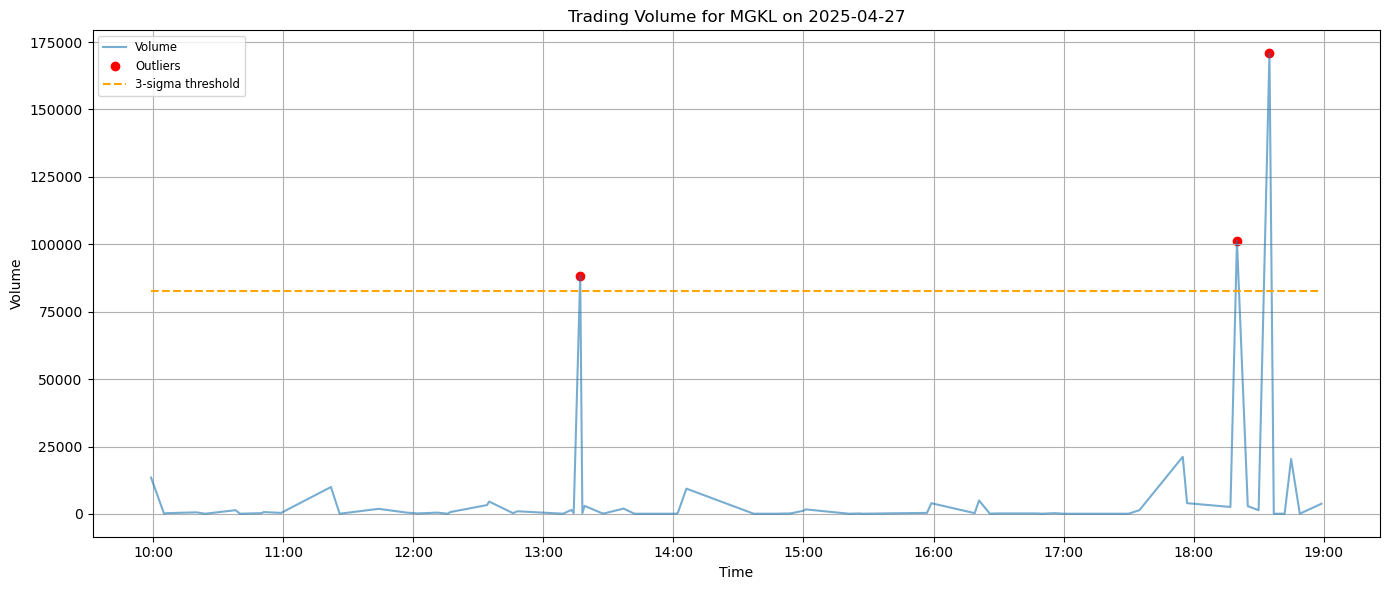

In [21]:
analyze_trading_volume('MGKL', '2025-04-27')

In [2]:
from moexalgo import Market, Ticker
import pandas as pd

market = Market('shares')
tickers_df = market.tickers()

results = []

for index, row in tickers_df.iterrows():
    ticker_symbol = row['ticker']
    issuesize = row['issuesize']
    
    try:
        ticker = Ticker(ticker_symbol)
        candles = ticker.candles(start='2025-05-22', end='2025-05-22', period='1d')
        
        if candles.empty:
            continue
        
        last_close_price = candles.iloc[-1]['close']
        capitalization = issuesize * last_close_price
        
        results.append({'ticker': ticker_symbol, 'capitalization': capitalization, 'last_close_price': last_close_price})
    except Exception as e:
        print(f"Error for {ticker_symbol}: {e}")

capitalization_df = pd.DataFrame(results)
capitalization_df_sorted = capitalization_df.sort_values(by='capitalization', ascending=False)

top_100_tickers = capitalization_df_sorted['ticker'].head(100).tolist()

top_100_tickers

['SBER',
 'LKOH',
 'ROSN',
 'NVTK',
 'GAZP',
 'SIBN',
 'PLZL',
 'GMKN',
 'YDEX',
 'TATN',
 'X5',
 'CHMF',
 'PHOR',
 'T',
 'SNGS',
 'NLMK',
 'AKRN',
 'UNAC',
 'VTBR',
 'RUAL',
 'MTSS',
 'MOEX',
 'MGNT',
 'SNGSP',
 'VSMO',
 'IRAO',
 'IRKT',
 'ALRS',
 'MAGN',
 'SVCB',
 'PIKK',
 'SBERP',
 'BANE',
 'AFLT',
 'ENPG',
 'CBOM',
 'HYDR',
 'TRNFP',
 'FLOT',
 'FESH',
 'RTKM',
 'NMTP',
 'LENT',
 'BSPB',
 'GCHE',
 'RASP',
 'VEON-RX',
 'HEAD',
 'AFKS',
 'FEES',
 'NKNC',
 'KZOS',
 'UGLD',
 'UWGN',
 'RAGR',
 'LSNG',
 'KAZT',
 'RGSS',
 'TRMK',
 'UPRO',
 'TATNP',
 'UTAR',
 'MSNG',
 'MGTS',
 'POSI',
 'PRMD',
 'ASTR',
 'LSRG',
 'APTK',
 'MDMG',
 'KMAZ',
 'LEAS',
 'INGR',
 'SMLT',
 'SFIN',
 'RENI',
 'ELMT',
 'GEMC',
 'MSRS',
 'BELU',
 'VKCO',
 'AQUA',
 'OZPH',
 'AVAN',
 'MRKS',
 'NKHP',
 'SELG',
 'OGKB',
 'USBN',
 'YAKG',
 'MRKP',
 'MBNK',
 'VJGZ',
 'SOFL',
 'CNRU',
 'VSEH',
 'DVEC',
 'MTLR',
 'MSTT',
 'RNFT']

In [3]:
capitalization_df_sorted.head(10)

,ticker,capitalization,last_close_price
183,SBER,6.533506e+12,302.66
93,LKOH,4.523028e+12,6528.00
169,ROSN,4.492038e+12,423.85
143,NVTK,3.359976e+12,1106.60
49,GAZP,3.098153e+12,130.87
188,SIBN,2.475907e+12,522.20
152,PLZL,2.272087e+12,1669.80
54,GMKN,1.605371e+12,105.02
245,YDEX,1.571566e+12,4024.00
204,TATN,1.509179e+12,692.70


Total number of 3-sigma anomalies on 2025-05-22 (Top 10 stocks): 163


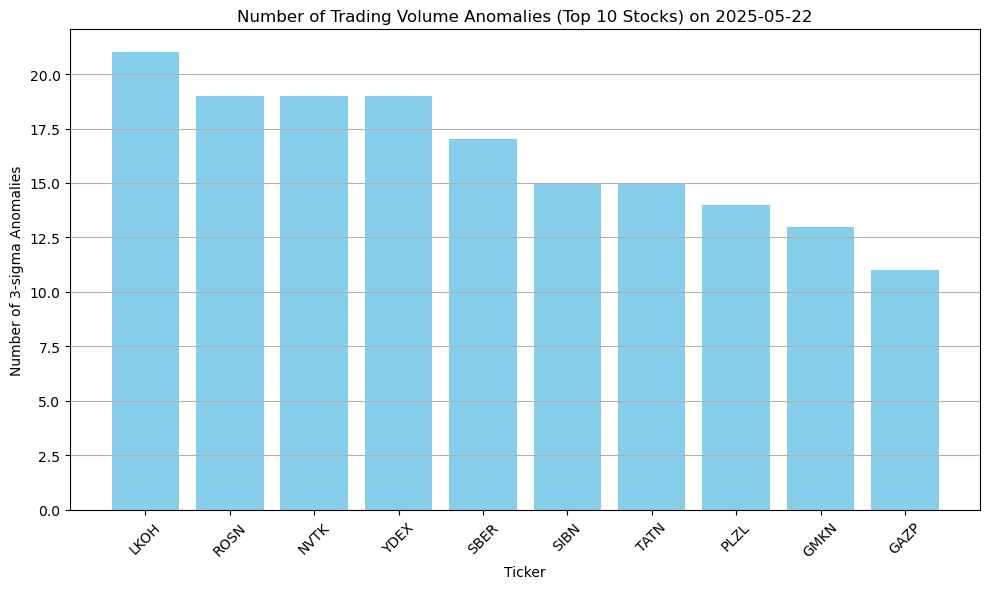

In [8]:
anomaly_results = []

for index, row in capitalization_df_sorted.head(10).iterrows():  
    ticker_symbol = row['ticker']
    try:
        ticker = Ticker(ticker_symbol)
        candles = ticker.candles(start='2025-05-22', end='2025-05-22', period='1min')
        
        if candles.empty:
            continue
        
        candles['begin'] = pd.to_datetime(candles['begin'])
        mean_vol = candles['volume'].mean()
        std_vol = candles['volume'].std()
        threshold = mean_vol + 3 * std_vol
        
        num_anomalies = (candles['volume'] > threshold).sum()
        
        anomaly_results.append({'ticker': ticker_symbol, 'anomalies': num_anomalies})
        
    except Exception as e:
        print(f"Error for {ticker_symbol}: {e}")

anomaly_df = pd.DataFrame(anomaly_results)

total_anomalies = anomaly_df['anomalies'].sum()
print(f"Total number of 3-sigma anomalies on 2025-05-22 (Top 10 stocks): {total_anomalies}")

anomaly_df_sorted = anomaly_df.sort_values(by='anomalies', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(anomaly_df_sorted['ticker'], anomaly_df_sorted['anomalies'], color='skyblue')
plt.xlabel('Ticker')
plt.ylabel('Number of 3-sigma Anomalies')
plt.title('Number of Trading Volume Anomalies (Top 10 Stocks) on 2025-05-22')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [32]:
capitalization_df_sorted.head(10)

,ticker,capitalization,last_close_price
155,ROSN,6.241797e+12,588.950
169,SBER,6.201498e+12,287.280
85,LKOH,5.044063e+12,7280.000
132,NVTK,4.277548e+12,1408.800
174,SIBN,3.927930e+12,828.450
46,GAZP,3.846709e+12,162.490
51,GMKN,2.376414e+12,155.460
204,UNAC,1.595809e+12,1.581
189,TATN,1.550356e+12,711.600
140,PLZL,1.511867e+12,1111.100
